## Observations and Insights

## Dependencies and starter code

In [320]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="left", on= "Mouse ID")
combined_data_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [321]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

drug_data_df = combined_data_df.groupby('Drug Regimen')
mean1 = drug_data_df['Tumor Volume (mm3)'].mean()
median1 = drug_data_df['Tumor Volume (mm3)'].median() 
Variance1 = drug_data_df['Tumor Volume (mm3)'].var() 
standard_deviation1 = drug_data_df['Tumor Volume (mm3)'].std()  
SEM1 = drug_data_df['Tumor Volume (mm3)'].sem() 

summary_stat = pd. DataFrame({"Mean":mean1,"Median":median1,"Variance": Variance1,"SD":standard_deviation1,"SEM":SEM1,})
summary_stat.head(10)


,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

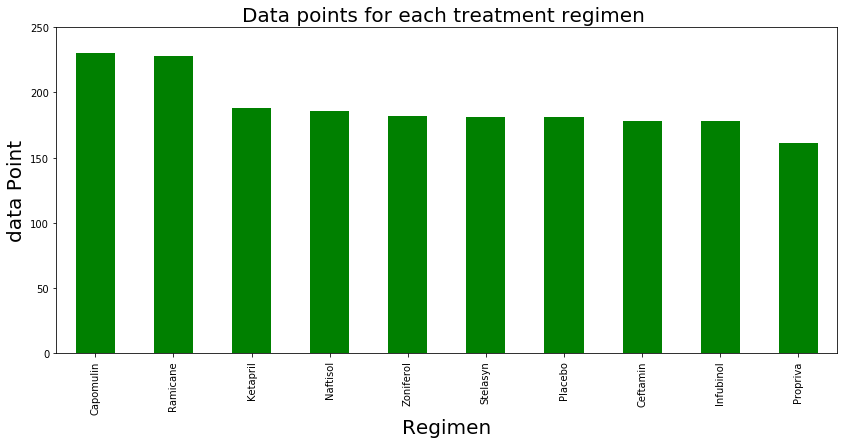

<Figure size 432x288 with 0 Axes>

In [322]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_point_count = combined_data_df['Drug Regimen'].value_counts()

data_point_count.plot(kind="bar", figsize=(14,6), color= "Green")

plt.title("Data points for each treatment regimen ")
plt.xlabel("Regimen")
plt.ylabel("data Point")

plt.ylim(0, max(data_point_count)+20)

plt.rc('axes', titlesize=20,)     # fontsize of the axes title
plt.rc('axes', labelsize= 20)    # fontsize of the x and y labels
plt.rc('figure', titlesize=10)

plt.show()
plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

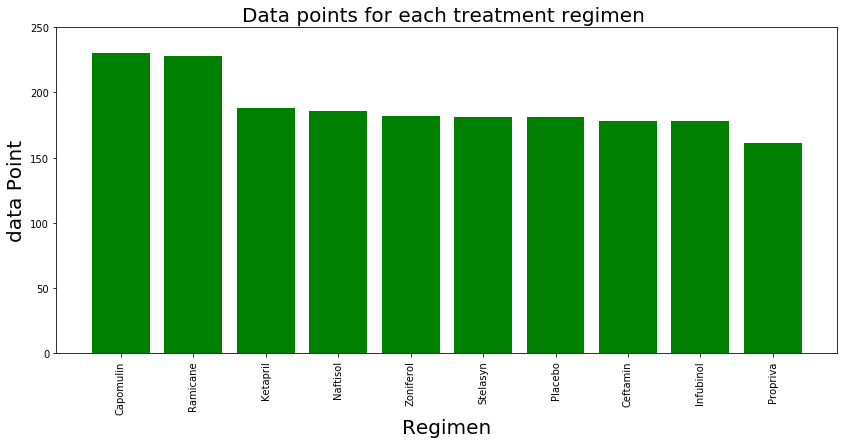

In [323]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


data_point_count = combined_data_df ['Drug Regimen'].value_counts()
data_point_count
data_point_df = pd.DataFrame({"count": data_point_count })
data_point_df


plt.figure(figsize=(14,6))
plt.bar(data_point_df.index.values, data_point_df["count"], color='green', alpha=1.0, align="center")
plt.ylim(0, max(data_point_count)+20)

plt.rc('axes', titlesize=20,)     # fontsize of the axes title
plt.rc('axes', labelsize= 20)    # fontsize of the x and y labels
plt.rc('figure', titlesize=10)
plt.title("Data points for each treatment regimen ")
plt.xlabel("Regimen")
plt.ylabel("data Point")
plt.xticks(rotation="vertical")



## Pie plots

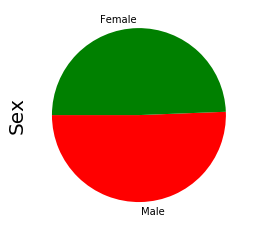

In [324]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_distribution = combined_data_df['Sex'].value_counts()
colors = ["red", "green"]
sex_distribution.plot(kind="pie", colors = colors, startangle=180)

([<matplotlib.patches.Wedge at 0x1a194dd210>,
 [Text(0.020992503472585782, -1.0997996703027118, 'Male'),
  Text(-0.020992503472585647, 1.0997996703027118, 'Female')],
 [Text(0.011450456439592244, -0.5998907292560246, '50.6%'),
  Text(-0.011450456439592171, 0.5998907292560246, '49.4%')])

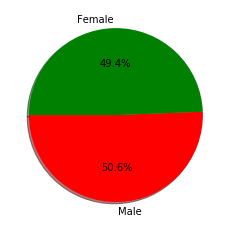

In [325]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart

labels = ["Male", "Female"]
sizes = combined_data_df["Sex"].value_counts()

colors = ["red", "green"]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=180)

## Quartiles, outliers and boxplots

In [326]:
# Most promising treatment regimens.
tumor_response_df = combined_data_df[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

tumor_response_df = pd.DataFrame(tumor_response_df.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].mean())

tumor_response_df.reset_index(inplace = True)
tumor_response_df.head()
tumor_response_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug Regimen',values='Tumor Volume (mm3)')  
tumor_response_pivot.head(10)
print(f"Four most promising regimens are: Capomulin, Ramicane, Infubinol, and Ceftamin")
tumor_response_pivot.head(10)

Four most promising regimens are: Capomulin, Ramicane, Infubinol, and Ceftamin


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [327]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

max_timepoint=combined_data_df.groupby(['Mouse ID']).max()
max_timepoint=max_timepoint.reset_index()
max_timepoint
max_timepoint=max_timepoint[['Mouse ID','Timepoint']].merge(combined_data_df,on=['Mouse ID','Timepoint'],how='left')
Cap_df=max_timepoint.loc[max_timepoint['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
Inf_df=max_timepoint.loc[max_timepoint['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
Ram_df=max_timepoint.loc[max_timepoint['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
Cef_df=max_timepoint.loc[max_timepoint['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']

quartiles_cap = Cap_df.quantile([.25,.5,.75])
lowerq = quartiles_cap[0.25]
upperq = quartiles_cap[0.75]
iqr_cap= round(upperq-lowerq,2)
print(f"The interquartile range of Capomulin is: {iqr_cap}")
quartiles_ram = Ram_df.quantile([.25,.5,.75])
lowerq = quartiles_ram[0.25]
upperq = quartiles_ram[0.75]
iqr_ram=round(upperq-lowerq,2)
print(f"The interquartile range of Ramicane is: {iqr_ram}")
quartiles_inf = Inf_df.quantile([.25,.5,.75])
lowerq = quartiles_inf[0.25]
upperq = quartiles_inf[0.75]
iqr_inf = round(upperq-lowerq,2)
print(f"The interquartile range of Infubinol is: {iqr_inf}")
quartiles_cef = Cef_df.quantile([.25,.5,.75])
lowerq = quartiles_cef[0.25]
upperq = quartiles_cef[0.75]
iqr_cef = round(upperq-lowerq,2)
print(f"The interquartile range of Ceftamin is: {iqr_cef}")





The interquartile range of Capomulin is: 7.78
The interquartile range of Ramicane is: 9.1
The interquartile range of Infubinol is: 11.48
The interquartile range of Ceftamin is: 15.58


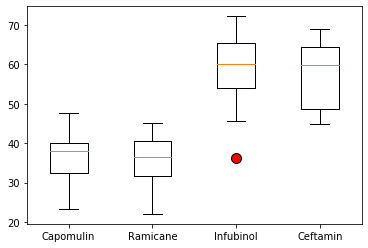

In [328]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker_outliers=dict(markerfacecolor='red',markersize=10) 
plt.boxplot([Cap_df,Ram_df, Inf_df, Cef_df],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=marker_outliers)
plt.show()


## Line and scatter plots

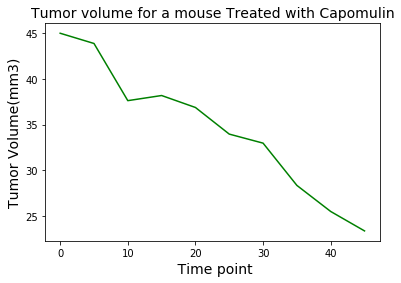

In [329]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_response_volume_df = combined_data_df[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)','Mouse ID']]
tumor_response_volume_df 
Mouse_volume_df=tumor_response_volume_df .loc[tumor_response_volume_df ['Mouse ID']=='s185']
Mouse_volume_df
x_axis= Mouse_volume_df["Timepoint"] 
y_axis= Mouse_volume_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color='green')
plt.title("Tumor volume for a mouse Treated with Capomulin",size= 14)
plt.xlabel(" Time point", size= 14)
plt.ylabel("Tumor Volume(mm3)",size= 14)

plt.show()

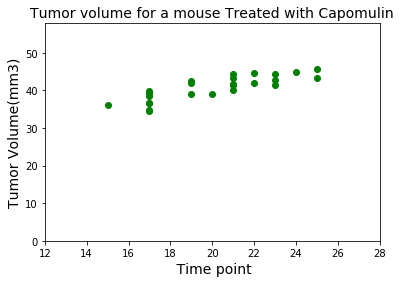

In [330]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_response_volume_df = combined_data_df[['Drug Regimen','Tumor Volume (mm3)','Weight (g)','Mouse ID']]
tumor_response_volume_df 
Mouse_volume_df=tumor_response_volume_df .loc[tumor_response_volume_df ['Drug Regimen']=='Capomulin']
average_volume_weight_df = Mouse_volume_df.groupby("Mouse ID").mean()
average_volume_weight_df
x_axis= average_volume_weight_df["Weight (g)"] 
y_axis= average_volume_weight_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, color='green')
plt.title("Tumor volume for a mouse Treated with Capomulin",size= 14)
plt.xlabel(" Time point", size= 14)
plt.ylabel("Tumor Volume(mm3)",size= 14)
plt.xlim(12, max(x_axis)+3)
plt.ylim(0, max(y_axis)+12)
plt.show()

The correlation between both factors is 0.84
y = 0.95x + 21.55


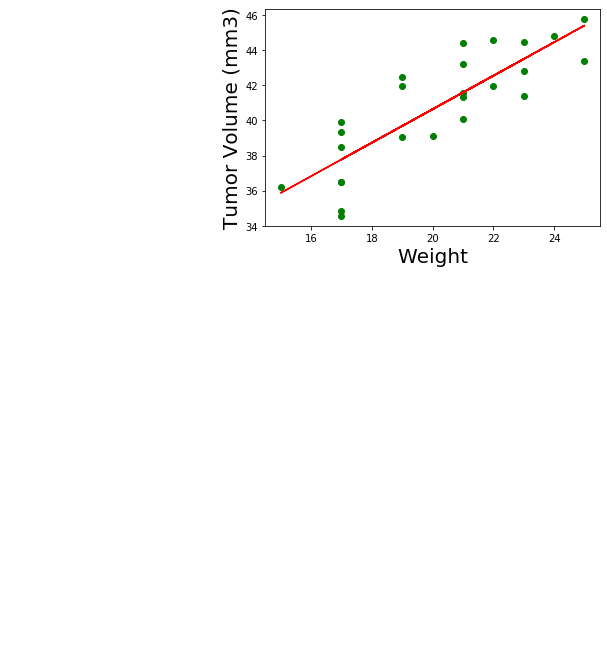

In [331]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_axis= average_volume_weight_df["Weight (g)"] 
y_axis= average_volume_weight_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_axis= average_volume_weight_df["Weight (g)"] 
y_axis= average_volume_weight_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (6,10), color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()